<a href="https://colab.research.google.com/github/CharryDavid/Computer-Vision-Class-/blob/main/TEST_CV_2025_David_Charry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEST COMPUTER VISION - DAVID CHARRY**



**1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.**

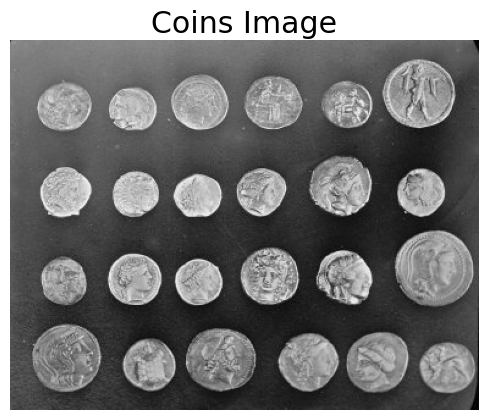

Image size (shape): (303, 384)
Pixel value range: min = 1 , max = 252


In [ ]:
import matplotlib.pyplot as plt
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_uint
from skimage.util import random_noise
from skimage.filters import gaussian, prewitt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk
from skimage.color import rgb2gray
from scipy import ndimage
import math
from skimage.filters import median

# Load the coins image
coins = data.coins()

# Visualize the image
plt.imshow(coins, cmap='gray')
plt.title('Coins Image')
plt.axis('off')
plt.show()

# Report the size of the image
print("Image size (shape):", coins.shape)

# Report the range of grayscale pixel values
print("Pixel value range: min =", coins.min(), ", max =", coins.max())


**2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.**

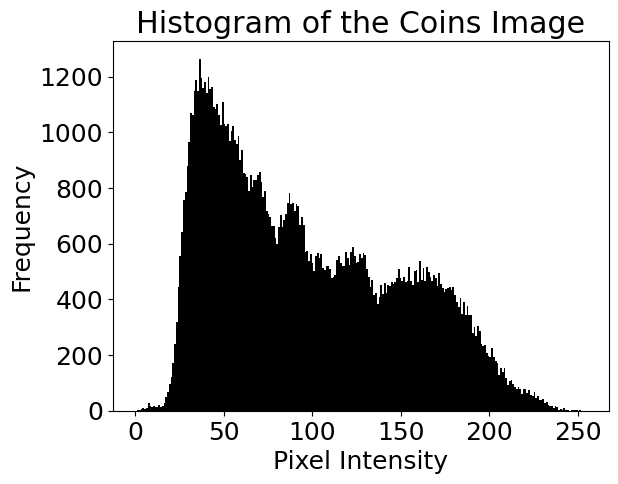

In [ ]:
# Load the coins image
coins = data.coins()

# Plot the histogram of pixel intensities
plt.hist(coins.ravel(), bins=256, range=(0, 255), color='black')
plt.title('Histogram of the Coins Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In the image analysis, the dark pixels primarily represent background or shadowed areas, characterized by their darker tones. Mid-level peaks typically derive from the surfaces of coins, displaying intermediate gray values as coins typically exhibit neither extreme black nor white shades. Meanwhile, bright pixels correspond to highlights or reflections on the coins, appearing significantly brighter due to their reflective nature. This differentiation in pixel intensity allows for the distinct identification and analysis of various elements within the image, from background nuances to surface details and specular highlights.

**3. Applied noise to the image and use the correct function to erase the noise.**

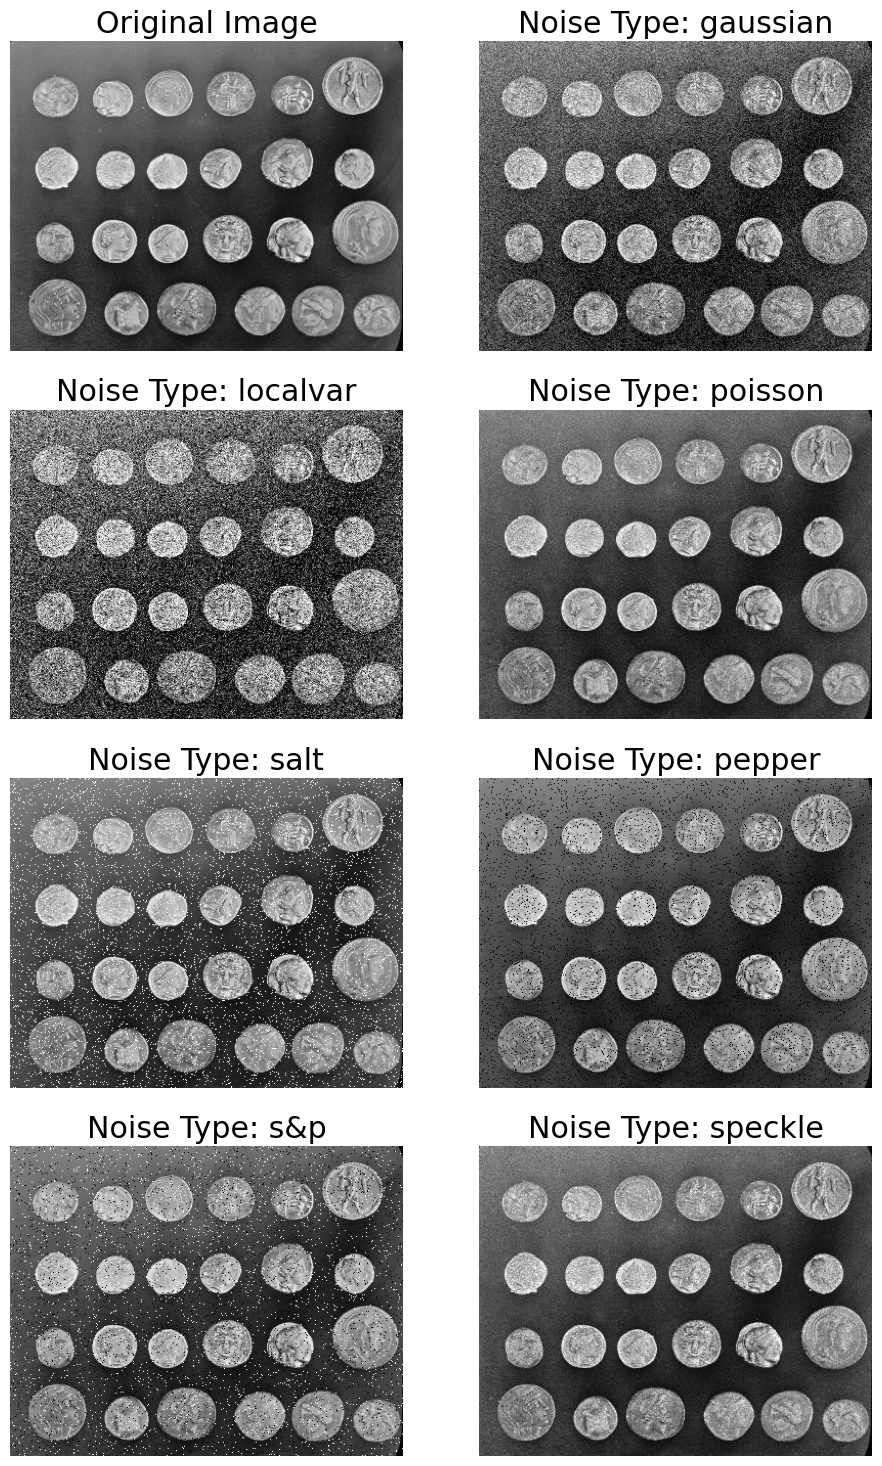

In [ ]:
# Task 1: Load the 'coffee' image
coins = data.coins()

# Task 2: Add different types of noise and display
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
fig, axes = plt.subplots(4, 2, figsize=(10, 15))  # Create a 4x2 grid of subplots

# Plot the original image in the top-left corner
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Add noise to the image and plot the results
for i, noise_type in enumerate(noise_types):
    # Calculate the row and column index for the subplot
    row = (i + 1) // 2  # Start from the second row
    col = (i + 1) % 2

    # Add noise to the image using the specified mode
    if noise_type == 'localvar':
        # Generate localvar noise using a separate method
        local_variance = np.random.rand(*coins.shape) * 0.1  # Adjust variance as needed
        noisy_image = random_noise(coins, mode='gaussian', var=local_variance)
    else:
        noisy_image = random_noise(coins, mode=noise_type)

    # Display the noisy image in the current subplot
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Type: {noise_type}')
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()



I have applied all the type of noises we have seen during lectures.

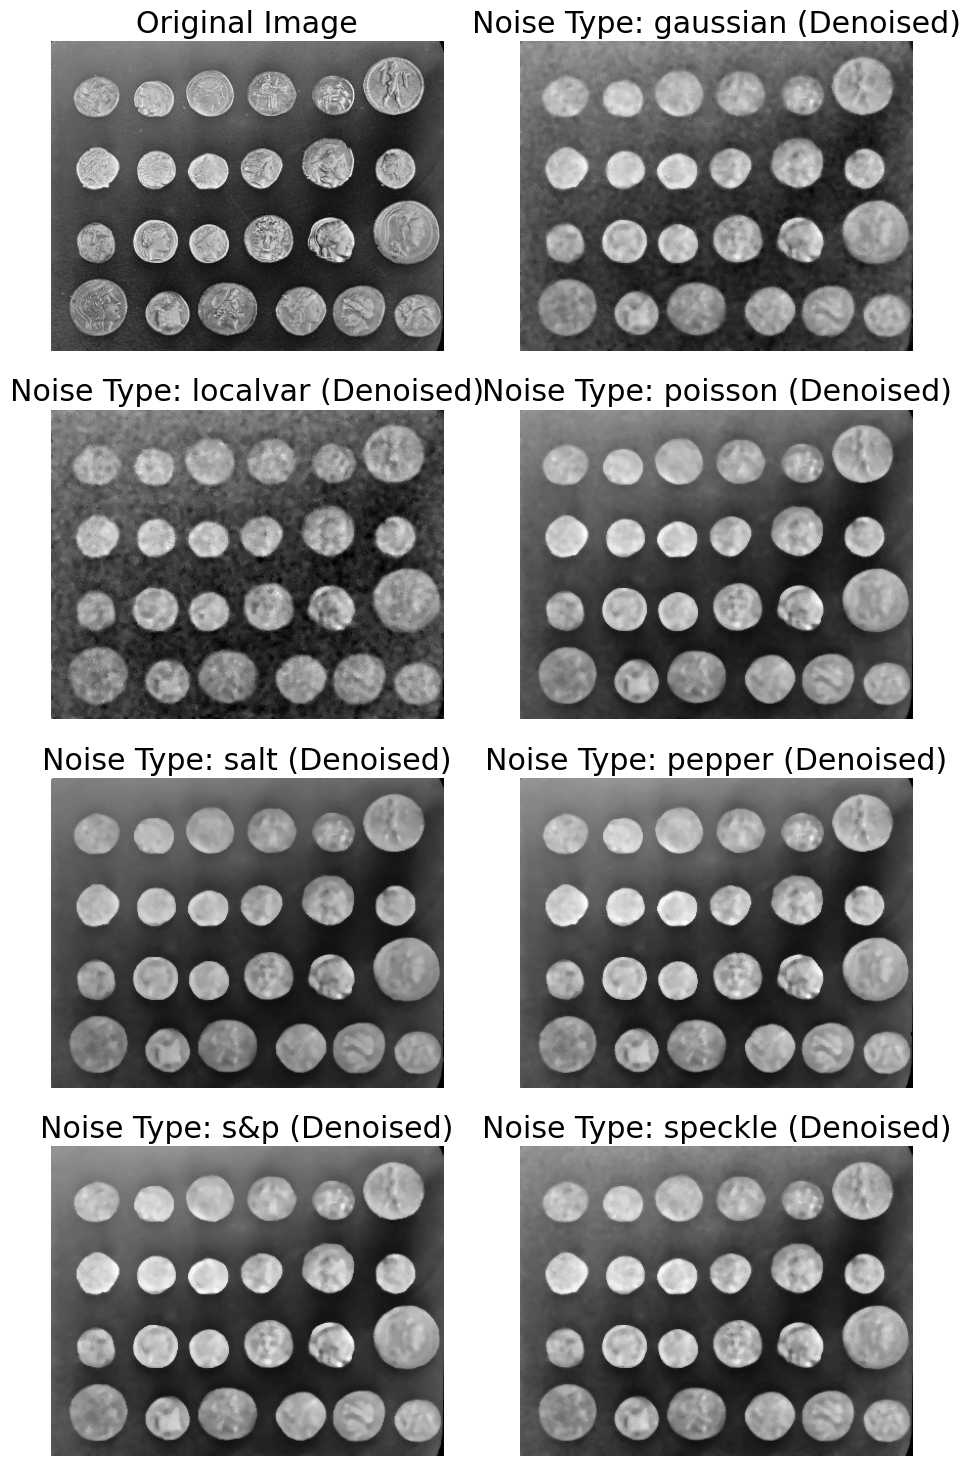

In [ ]:
# different types of noise and display denoised images
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
fig, axes = plt.subplots(4, 2, figsize=(10, 15))  # Create a 4x2 grid of subplots

# original image in the top-left corner
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Add noise to the image, denoise it, and plot the results
for i, noise_type in enumerate(noise_types):
    row = (i + 1) // 2
    col = (i + 1) % 2

    # Add noise to the image using the specified mode
    if noise_type == 'localvar':
        local_variance = np.random.rand(*coins.shape) * 0.1
        noisy_image = random_noise(coins, mode='gaussian', var=local_variance)
    else:
        noisy_image = random_noise(coins, mode=noise_type)

    # Convert noisy image to uint8 for median filter input
    noisy_uint8 = (noisy_image * 255).astype(np.uint8)

    # Apply median filter to denoise
    denoised_image = median(noisy_uint8, disk(3))

    # Display the denoised image in the current subplot
    axes[row, col].imshow(denoised_image, cmap='gray')
    axes[row, col].set_title(f'Noise Type: {noise_type} (Denoised)')
    axes[row, col].axis('off')

plt.tight_layout()

 **4. Segment the image using a k-means clustering algorithm with k=2 and represent the**

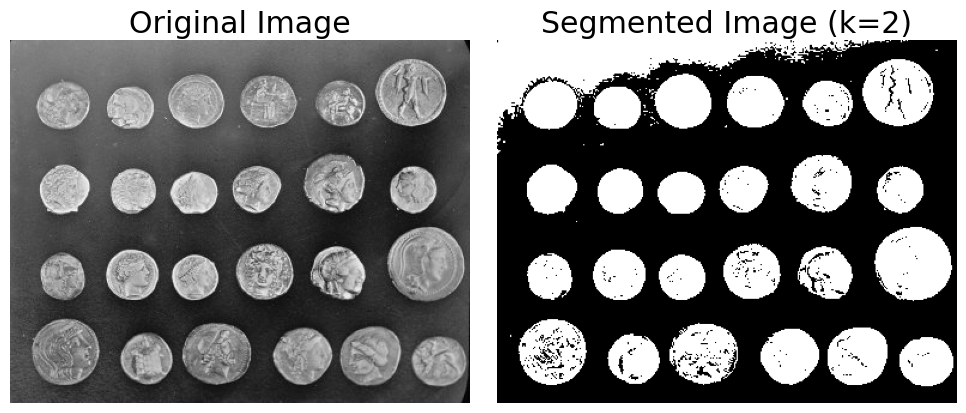

In [ ]:
# Reshape the image to (num_pixels, 1) for clustering
pixels = coins.reshape(-1, 1)

# Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
segmented = kmeans.labels_.reshape(coins.shape)

# Plot original and segmented image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented, cmap='gray')
axes[1].set_title('Segmented Image (k=2)')
axes[1].axis('off')

plt.tight_layout()


**5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?**

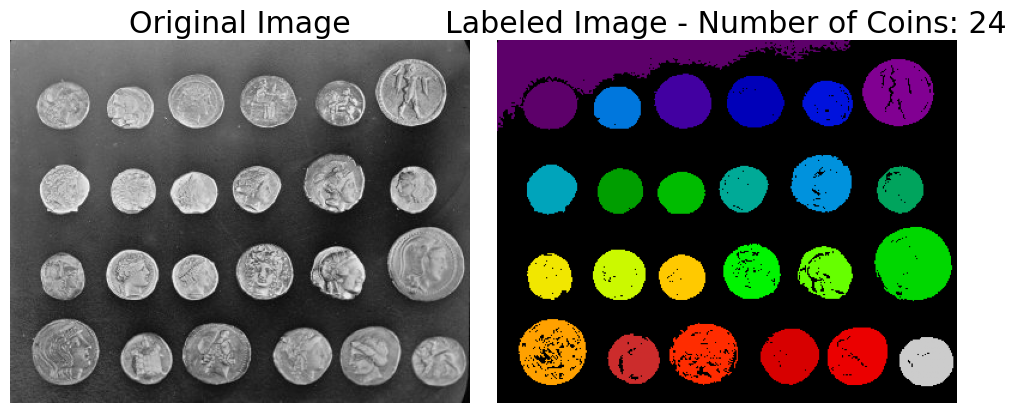

Number of coins in the image: 24


In [ ]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.morphology import remove_small_objects

# Use Otsu threshold instead of mean
threshold = threshold_otsu(coins)
binary_coins = coins > threshold

# Remove small objects (noise)
binary_coins_cleaned = remove_small_objects(binary_coins, min_size=100)

# Label objects
labeled_coins, num_coins = label(binary_coins_cleaned, return_num=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(labeled_coins, cmap='nipy_spectral')
axes[1].set_title(f'Labeled Image - Number of Coins: {num_coins}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f'Number of coins in the image: {num_coins}')


**6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length**

      area  major_axis_length  orientation
0   8755.0         291.294551    -1.423307
1   2459.0          59.966495     1.552547
2   1684.0          47.400067     1.330651
3   1631.0          47.608317     1.560757
4   1193.0          41.310433     1.383445
5   1133.0          39.977857     1.446910
6   1834.0          51.413541     1.532118
7   1325.0          42.451724    -0.883311
8   1203.0          40.921169    -1.034534
9   1133.0          39.719469    -0.873364
10  1129.0          39.179294    -0.923138
11  1104.0          39.634983    -1.500398
12  3054.0          64.238604     1.321690
13  1633.0          48.455200    -1.482099
14  1352.0          47.315544     0.943862
15  1461.0          44.279748     1.510757
16  1095.0          37.726049    -1.098781
17  1148.0          39.093268     1.512176
18  2099.0          58.230243    -1.108783
19  1954.0          55.822104    -1.406812
20  1918.0          52.847912    -0.985728
21  1728.0          48.536525    -1.134875
22  1312.0 

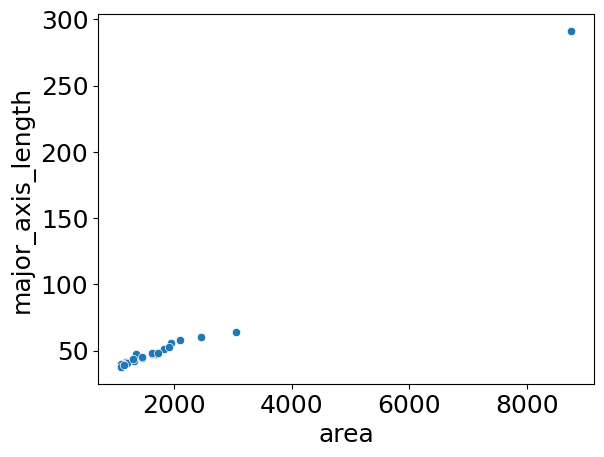

In [ ]:
from skimage.measure import label, regionprops_table
import pandas as pd
import seaborn as sns

# Extract properties from labeled image
props = measure.regionprops_table(labeled_coins, properties=['area', 'major_axis_length', 'orientation'])
df_features = pd.DataFrame(props)

# Print the DataFrame
print(df_features)

# Print average values
print('Average area:', df_features['area'].mean())
print('Average major axis length:', df_features['major_axis_length'].mean())
print('Average orientation:', df_features['orientation'].mean())

# Scatterplot area vs major axis length
sns.scatterplot(x='area', y='major_axis_length', data=df_features)
plt.show()


**7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?**

In [ ]:
# Filter regions with area > 1750
filtered_coins = df_features[df_features['area'] > 1750]

# Count how many coins satisfy the condition
num_filtered_coins = filtered_coins.shape[0]

print(f'Number of coins with area > 1750 pixels: {num_filtered_coins}')


Number of coins with area > 1750 pixels: 7


**8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).**

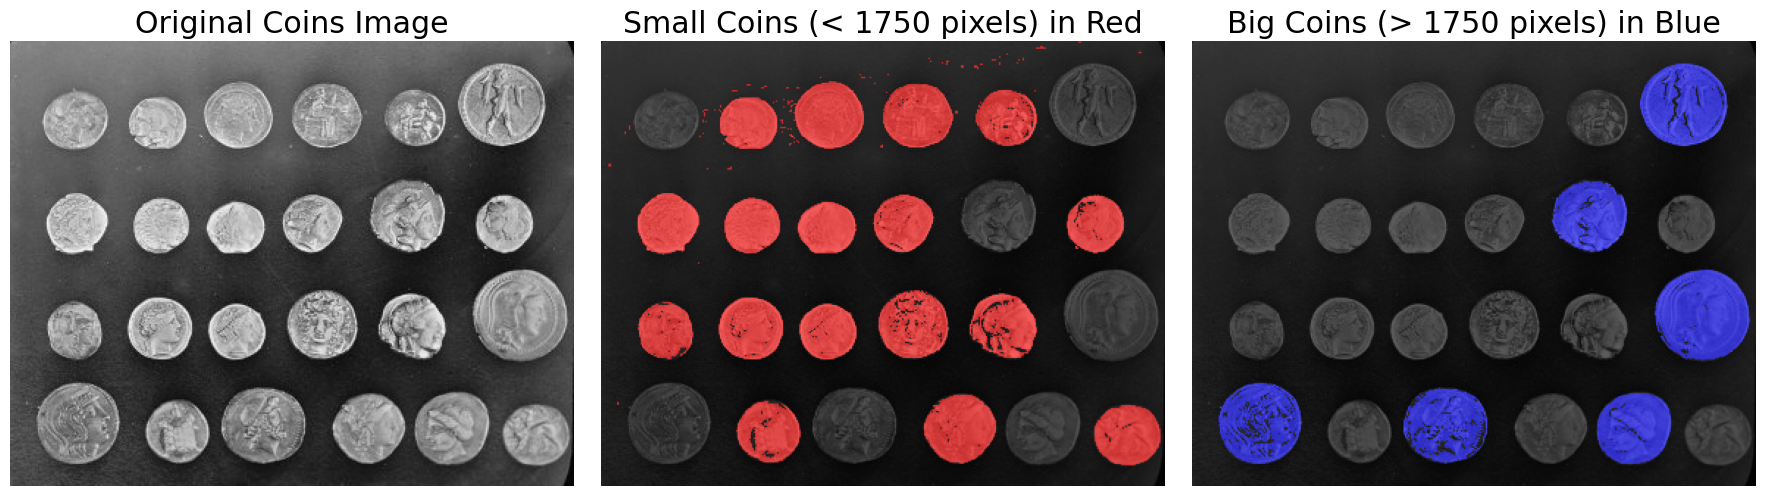

In [ ]:
# Clear objects connected to image border (to remove partial coins)
cleared = clear_border(binary)

# Label connected components (coins)
label_image = measure.label(cleared)

# Get properties of labeled regions
regions = measure.regionprops(label_image)

# Create blank RGB images for small and big coins highlighting
small_coins_img = np.zeros((*coins.shape, 3), dtype=np.uint8)
big_coins_img = np.zeros((*coins.shape, 3), dtype=np.uint8)

# Loop through regions and paint them red or blue depending on area threshold
area_threshold = 1750
for region in regions:
    # Create mask for current coin
    coin_mask = label_image == region.label

    if region.area < area_threshold:
        # Paint small coins red (RGB: 255,0,0)
        small_coins_img[coin_mask] = [255, 0, 0]
    else:
        # Paint big coins blue (RGB: 0,0,255)
        big_coins_img[coin_mask] = [0, 0, 255]

# For visualization, convert original grayscale coins image to RGB
coins_rgb = color.gray2rgb(coins)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Coins Image')
axes[0].axis('off')

axes[1].imshow(coins_rgb)
axes[1].imshow(small_coins_img, alpha=0.6)  # Overlay red small coins with transparency
axes[1].set_title('Small Coins (< 1750 pixels) in Red')
axes[1].axis('off')

axes[2].imshow(coins_rgb)
axes[2].imshow(big_coins_img, alpha=0.6)  # Overlay blue big coins with transparency
axes[2].set_title('Big Coins (> 1750 pixels) in Blue')
axes[2].axis('off')

plt.tight_layout()
plt.show()


**9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)**

To segment an RGB image using unsupervised clustering (other than K-Means), we first reshape the image so each pixel is a data point defined by its RGB values. Then, we apply clustering algorithms like Gaussian Mixture Models (GMM) and Agglomerative Clustering to group pixels with similar colors.

GMM models pixel colors as mixtures of Gaussian distributions, giving soft cluster assignments, while Agglomerative Clustering merges pixels hierarchically to form distinct clusters. After clustering, we create segmented images by replacing each pixel’s color with its cluster’s average color.

Comparing the results, GMM produces smoother transitions between regions, whereas Agglomerative Clustering gives clearer, more defined segments. This shows how different clustering methods affect segmentation outcomes.

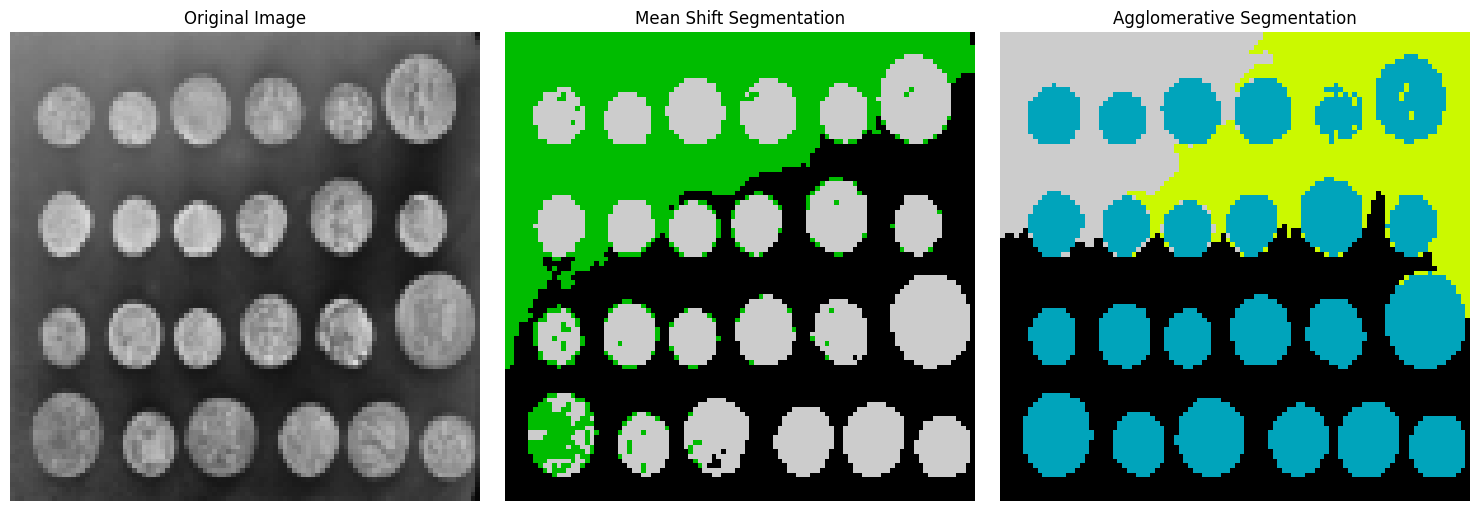

In [ ]:

# grayscale image and convert to RGB
image = gray2rgb(data.coins())
image_small = resize(image, (100, 100), anti_aliasing=True)
h, w, c = image_small.shape

# color features
pixels = image_small.reshape(-1, 3)

# Add spatial coordinates to preserve structure
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
spatial = np.stack([x_coords.ravel(), y_coords.ravel()], axis=1)
features = np.hstack((pixels, spatial))

# Standardize features
features_std = StandardScaler().fit_transform(features)

# ----------- Clustering (excluding KMeans) -----------

# Mean Shift
meanshift = MeanShift(bandwidth=1.5, bin_seeding=True)
labels_meanshift = meanshift.fit_predict(features_std)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(features_std)

# Reshape labels back to image format
seg_meanshift = labels_meanshift.reshape(h, w)
seg_agglo = labels_agglo.reshape(h, w)

# ----------- Plot Original + Segmentations -----------

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image_small)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(seg_meanshift, cmap='nipy_spectral')
axs[1].set_title("Mean Shift Segmentation")
axs[1].axis('off')

axs[2].imshow(seg_agglo, cmap='nipy_spectral')
axs[2].set_title("Agglomerative Segmentation")
axs[2].axis('off')

plt.tight_layout()
plt.show()


**10. Extract the main texture features of this image**

In [ ]:
!pip install -U scikit-image --quiet
from skimage.feature import graycomatrix, graycoprops

coins = data.coins()

# Quantize the grayscale image (reduce gray levels for GLCM)
coins_quantized = (coins / 16).astype(np.uint8)  # Convert to 0-15 levels (uint8)

# Compute GLCM (Gray Level Co-occurrence Matrix)
glcm = graycomatrix(
    coins_quantized,
    distances=[1],
    angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
    levels=16,
    symmetric=True,
    normed=True
)

#Extract texture features
features = {
    "Contrast": graycoprops(glcm, 'contrast'),
    "Dissimilarity": graycoprops(glcm, 'dissimilarity'),
    "Homogeneity": graycoprops(glcm, 'homogeneity'),
    "Energy": graycoprops(glcm, 'energy'),
    "Correlation": graycoprops(glcm, 'correlation'),
    "ASM": graycoprops(glcm, 'ASM')
}

# results
for name, values in features.items():
    print(f"{name}: {values}")


Contrast: [[1.50463166 2.21389172 1.43890556 2.19593485]]
Dissimilarity: [[0.57972925 0.72692062 0.5847044  0.72281396]]
Homogeneity: [[0.77986311 0.74143872 0.77403261 0.74249939]]
Energy: [[0.22393403 0.21027677 0.21912031 0.21034018]]
Correlation: [[0.93180265 0.89979668 0.93479003 0.90060894]]
ASM: [[0.05014645 0.04421632 0.04801371 0.04424299]]


**Personal discussion**

As I mentioned previously during our conversation right after the last offline class in Tirana. I appreciated very much the effort into letting us know the practical uses of this course and how this could be beneficial in the real world, rather than just teaching information without an insight of the practical use of it. I think this approach  make this course very interesting, because we can see the different applications in this field. On the other hand, I believe that to learn more and get a proper understanding of every topic more than 2 weeks will be needed.

It was a very interesting course and I am hoping to learn more about it in the future.